# Example 9.5: Modified Brayton Cycle (Real-Fluid)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement

A Brayton cycle with intercooling, reheat, and regeneration has the following properties:
\begin{align}
T_1&=300\ \mathrm{K} & T_3&=350\ \mathrm{K} & T_6&=T_8=1400\ \mathrm{K} \\
p_1 &= 1\ \mathrm{bar}  & \frac{p_2}{p_1}&=\frac{p_4}{p_3}=\sqrt{10} & p_7&=\sqrt{10}\ \mathrm{bar}\\
\eta_{c,1} &= \eta_{c,2} = 0.8 & \eta_{t,1}&=\eta_{t,2}=0.8 & \eta_{reg}&= 0.85
\end{align}
Determine:
* (a) $w_{net}$
* (b) $q_{in}$
* (c) $\eta_{th}$
* (d) $BWR$

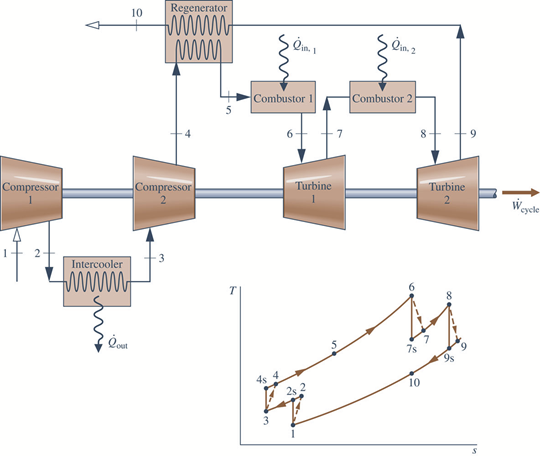

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074254&node=10465182&a=1163985616&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from math import log, sqrt
from kilojoule.templates.kSI import *
    
air = realfluid.Properties('Air')

### Given Parameters
We now define variables to hold our known values.

In [2]:
T[1] = Quantity(300,'K')      # Compressor Inlet Temperature
T[3] = Quantity(350,'K')
T[6] = T[8] = Quantity(1400,'K')
p[1] = Quantity(1,'bar')      # Compressor Inlet pressure
r_p = Quantity(sqrt(10),' ')   # Pressure ratio
p[7] = Quantity(sqrt(10),'bar')
eta_c = Quantity(0.8,'')      # Compressor Isentropioc Efficiency
eta_t = Quantity(0.8,'')      # Turbine Isentropic Efficiency
eta_reg = Quantity(0.85,'')   # Regenerator effectiveness

Summary();

<IPython.core.display.Latex object>

,T,p
unit,K,kPa
1,300,100
3,350,-
6,1400,-
7,-,316.228
8,1400,-


### Assumptions
- Real fluid
  - non-ideal gas
  - variable specific heat
- Isobaric heat exchagners: Intercooler, Combustors, Regeneator
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
# Isobaric heat exchangers
p[2] = r_p*p[1]
p[3] = p[2]
p[4] = r_p*p[3]
p[5] = p[4]
p[6] = p[5]
p[8] = p[7]
p[9] = p[1]
p[10] = p[9]

Summary();

<IPython.core.display.Latex object>

,T,p
unit,K,kPa
1,300,100.000000
2,-,316.227766
3,350,316.227766
4,-,1000.000000
5,-,1000.000000
6,1400,1000.000000
7,-,316.227766
8,1400,316.227766
9,-,100.000000


#### (a) $w_{net}$

In [4]:
##### 1$\to$2) Non-ideal compression
# Inlet properties
h[1] = air.h(T=T[1],p=p[1])
s[1] = air.s(T=T[1],p=p[1])
# Isentropic exit state: Isentropic Ideal Gas Relations
p['2s'] = p[2]
s['2s'] = s[1]
h['2s'] = air.h(p=p['2s'],s=s['2s'])
T['2s'] = air.T(p=p['2s'],s=s['2s'])

# Isentropic efficiency
h[2] = h[1] + (h['2s']-h[1])/eta_c
T[2] = air.T(h=h[2],p=p[1])
s[2] = air.s(h=h[2],p=p[2])

# First Law for compressor
w_1_to_2 = (h[1]-h[2])


##### 2$\to$3) Intercooling
h[3] = air.h(T=T[3],p=p[3])
s[3] = air.s(T=T[3],p=p[3])
q_2_to_3 = (h[3]-h[2])


##### 3$\to$4) Non-ideal compression
# Isentropic exit state
p['4s'] = p[4]
s['4s'] = s[3]
h['4s'] = air.h(p=p['4s'],s=s['4s'])
T['4s'] = air.T(p=p['4s'],s=s['4s'])

# Isentropic efficiency
h[4] = h[3] + (h['4s']-h[3])/eta_c
T[4] = air.T(h=h[4],p=p[4])
s[4] = air.s(h=h[4],p=p[4])

# First Law for compressor
w_3_to_4 = (h[3]-h[4])


##### 4$\to$5) Regenerator
# Skip for now.  Need $h_9$ to analyze


##### 5$\to$6) Combustor 1 
# Skip for now.  Need $h_5$ from regenerator analysis


##### 6$\to$7) Non-ideal expansion
h[6] = air.h(T=T[6],p=p[6])
s[6] = air.s(T=T[6],p=p[6])

# Isentropic exit state
p['7s'] = p[7]
s['7s'] = s[6]
h['7s'] = air.h(p=p['7s'],s=s['7s'])
T['7s'] = air.T(h=h['7s'],p=p['7s'])

# Isentropic efficiency
h[7] = h[6] - eta_t*(h[6]-h['7s'])
T[7] = air.T(h=h[7],p=p[7])
s[7] = air.s(p=p[7],h=h[7])

# First law for turbine
w_6_to_7 = (h[6]-h[7])


##### 7$\to$8) Combustor 2
h[8] = air.h(T=T[8],p=p[8])
s[8] = air.s(T=T[8],p=p[8])
q_7_to_8 = h[8]-h[7]


##### 8$\to$9) Non-ideal expansion
# Isentropic exit state
p['9s'] = p[9]
s['9s'] = s[8]
h['9s'] = air.h(p=p['9s'],s=s['9s'])
T['9s'] = air.T(h=h['9s'],p=p[8])

# Isentropic efficiency
h[9] = h[8] - eta_t*(h[8]-h['9s'])
T[9] = air.T(h=h[9],p=p[9])
s[9] = air.s(h=h[9],p=p[9])

# First law for turbine
w_8_to_9 = (h[8]-h[9])


###### $w_{net}$
w_net = w_1_to_2 + w_3_to_4 + w_6_to_7 + w_8_to_9

Calculations();
states.display()

#### 1$\to$2) Non-ideal compression

 Inlet properties

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic exit state: Isentropic Ideal Gas Relations

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 First Law for compressor

<IPython.core.display.Latex object>

#### 2$\to$3) Intercooling

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 3$\to$4) Non-ideal compression

 Isentropic exit state

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 First Law for compressor

<IPython.core.display.Latex object>

#### 4$\to$5) Regenerator

 Skip for now.  Need $h_9$ to analyze

#### 5$\to$6) Combustor 1 

 Skip for now.  Need $h_5$ from regenerator analysis

#### 6$\to$7) Non-ideal expansion

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic exit state

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 First law for turbine

<IPython.core.display.Latex object>

#### 7$\to$8) Combustor 2

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 8$\to$9) Non-ideal expansion

 Isentropic exit state

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 First law for turbine

<IPython.core.display.Latex object>

##### $w_{net}$

<IPython.core.display.Latex object>

,T,p,h,s
unit,K,kPa,kJ/kg,kJ/K/kg
1,300,100.000000,426.301,3.8905
2,444.993,316.227766,573.018,3.95864
2s,416.389,316.227766,543.675,3.8905
3,350,316.227766,476.334,3.71434
4,518.013,1000.000000,647.598,3.78267
4s,484.9,1000.000000,613.345,3.71434
5,-,1000.000000,-,-
6,1400,1000.000000,1642.54,4.89025
7,1126.99,316.227766,1319.01,4.96433


#### (b) Heat input

In [5]:
##### 4$\to$5 and 9$\to$10) Regenerator
h[5] = h[4] + eta_reg*(h[9]-h[4])
h[10] = h[9] - (h[5]-h[4])
T[5] = air.T(h=h[5],p=p[5])
s[5] = air.s(h=h[5],p=p[5])
T[10] = air.T(h=h[10],p=p[10])
s[10] = air.s(h=h[10],p=p[10])

##### 5$\to$6) Combustor 1 
q_5_to_6 =h[6]-h[5]


##### 7$\to$8) Combustor 2
q_7_to_8 = h[8]-h[7]


##### Heat input
q_in = q_5_to_6 + q_7_to_8

Calculations();

#### 4$\to$5 and 9$\to$10) Regenerator

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 5$\to$6) Combustor 1 

<IPython.core.display.Latex object>

#### 7$\to$8) Combustor 2

<IPython.core.display.Latex object>

#### Heat input

<IPython.core.display.Latex object>

#### (c) Thermal efficiency

In [6]:
##### Thermal efficiency
eta_th = w_net/q_in

##### Second Law efficiency
# The low temperature is assumed to be the intake temperature
T_L = T[1]
# The high temperature is approximated as the hottest temperature of the working fluid
T_H = T[6]
# Carnot efficiency
eta_th_Carnot = 1-T_L/T_H

# Second Law efficiency
eta_II = eta_th/eta_th_Carnot

Calculations();

#### Thermal efficiency

<IPython.core.display.Latex object>

#### Second Law efficiency

 The low temperature is assumed to be the intake temperature

<IPython.core.display.Latex object>

 The high temperature is approximated as the hottest temperature of the working fluid

<IPython.core.display.Latex object>

 Carnot efficiency

<IPython.core.display.Latex object>

 Second Law efficiency

<IPython.core.display.Latex object>

#### (d) Back-Work-Ratio

In [7]:
##### work in
w_in = -(w_1_to_2 + w_3_to_4)

##### work out
w_out = w_6_to_7 + w_8_to_9

##### back work ratio
BWR = w_in/w_out

Calculations();

#### work in

<IPython.core.display.Latex object>

#### work out

<IPython.core.display.Latex object>

#### back work ratio

<IPython.core.display.Latex object>

#### Summary of Results

In [8]:
Summary()
Summary(['w_net','q_in','eta_th','BWR']);

<IPython.core.display.Latex object>

,T,p,h,s
unit,K,kPa,kJ/kg,kJ/K/kg
1,300.000000,100.000000,426.300776,3.890501
2,444.993407,316.227766,573.017977,3.958643
2s,416.389023,316.227766,543.674536,3.890501
3,350.000000,316.227766,476.334363,3.714342
4,518.012779,1000.000000,647.598028,3.782671
4s,484.899672,1000.000000,613.345295,3.714342
5,1039.367378,1000.000000,1218.125053,4.540090
6,1400.000000,1000.000000,1642.536333,4.890246
7,1126.993542,316.227766,1319.012131,4.964330


<IPython.core.display.Latex object>

### Plotting

In [9]:
for i in [1,'2s',2,3,'4s',4,5,6,'7s',7,8,'9s',9,10]:
    v[i] = air.v(T=T[i],p=p[i])

#ShowCalculations( comments=True);
states.display()

,T,p,v,h,s
unit,K,kPa,m³/kg,kJ/kg,kJ/K/kg
1,300.000000,100.000000,0.860882,426.300776,3.890501
2,444.993407,316.227766,0.404280,573.017977,3.958643
2s,416.389023,316.227766,0.378235,543.674536,3.890501
3,350.000000,316.227766,0.317722,476.334363,3.714342
4,518.012779,1000.000000,0.149207,647.598028,3.782671
4s,484.899672,1000.000000,0.139638,613.345295,3.714342
5,1039.367378,1000.000000,0.299256,1218.125053,4.540090
6,1400.000000,1000.000000,0.402841,1642.536333,4.890246
7,1126.993542,316.227766,1.023932,1319.012131,4.964330


#### (a) $p$-$v$

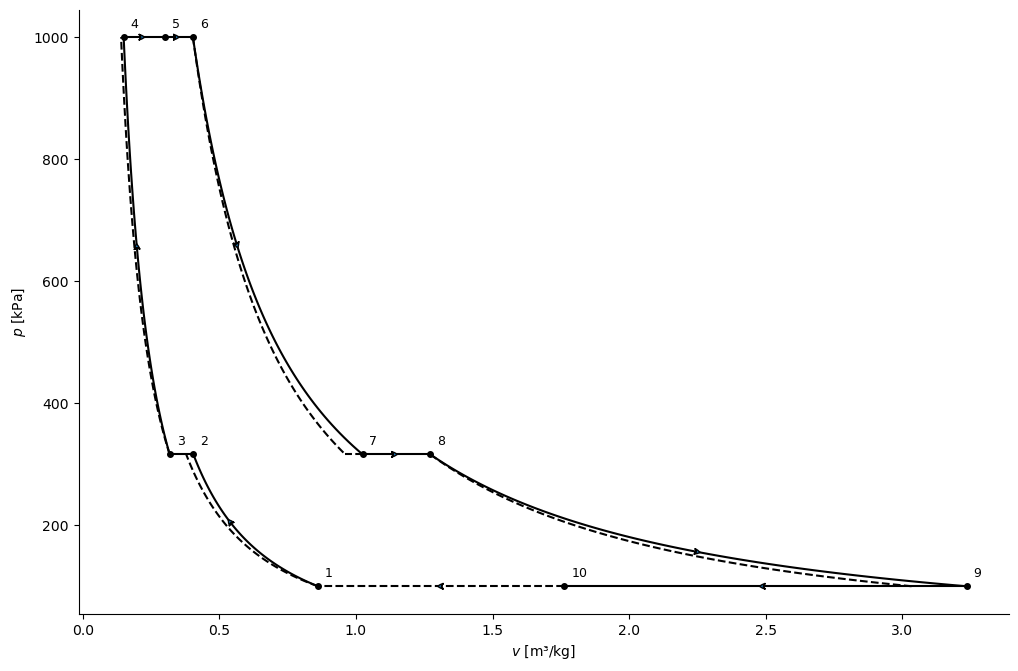

In [10]:
pv = air.pv_diagram()

# plot each state on the p,v diagram
for i in [1,2,3,4,5,6,7,8,9,10]:
    pv.plot_state(states[i],label_loc='north east')


# plot the process paths
pv.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[1],states[2],path='isentropic efficiency')
pv.plot_process(states[2],states[3],path='isobaric',arrow=False)
pv.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[3],states[4],path='nonideal')
pv.plot_process(states[4],states[5],path='isobaric')
pv.plot_process(states[5],states[6],path='isobaric')
pv.plot_process(states[6],states['7s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[7],states['7s'],path='isobaric',linestyle='dashed',arrow=False)
pv.plot_process(states[6],states[7],path='nonideal')
pv.plot_process(states[7],states[8],path='isobaric')
pv.plot_process(states[8],states['9s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[8],states[9],path='nonideal')
pv.plot_process(states[9],states[10],path='isobaric')
pv.plot_process(states[10],states[1],path='isobaric',linestyle='dashed');

#### (b) $T$-$s$ diagram

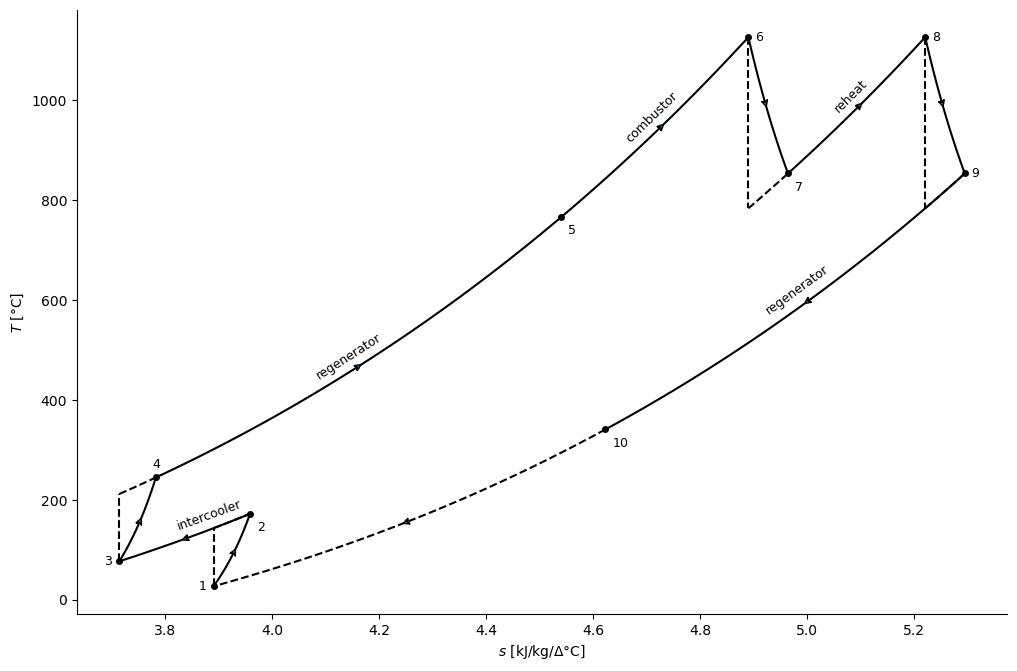

In [11]:
Ts = air.Ts_diagram()

# plot each state on the p,v diagram
for i in [1,3]:
    Ts.plot_state(states[i],label_loc='west')
Ts.plot_state(states[4])
for i in [6,8,9]:
    Ts.plot_state(states[i],label_loc='east')
for i in [2,5,7,10]:
    Ts.plot_state(states[i],label_loc='south east')
    
# plot the process paths
Ts.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[1],states[2],path='nonideal')
Ts.plot_process(states['2s'],states[2],path='isobaric',linestyle='dashed',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric',label='intercooler',labelprops=dict(ha='left'))
Ts.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[3],states[4],path='nonideal')
Ts.plot_process(states['4s'],states[4],path='isobaric',linestyle='dashed',arrow=False)
Ts.plot_process(states[4],states[5],path='isobaric',label='regenerator')
Ts.plot_process(states[5],states[6],path='isobaric',label='combustor')
Ts.plot_process(states[6],states['7s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[6],states[7],path='nonideal')
Ts.plot_process(states['7s'],states[7],path='isobaric',linestyle='dashed',arrow=False)
Ts.plot_process(states[7],states[8],path='isobaric',label='reheat')
Ts.plot_process(states[8],states['9s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[8],states[9],path='nonideal');
Ts.plot_process(states['9s'],states[9],path='isobaric',linestyle='dashed',arrow=False)
Ts.plot_process(states[9],states[10],path='isobaric',label='regenerator');
Ts.plot_process(states[10],states[1],path='isobaric',linestyle='dashed');